In [65]:
from selenium import webdriver
import time
from bs4 import BeautifulSoup
import random
import pandas as pd
import xlsxwriter
import openpyxl as op
from PIL import Image
import os
import glob
import urllib.request
import urllib

In [1]:
id_ = input('아이디를 입력하세요:   ')
password_ = input('비밀번호를 입력하세요:   ')
search = input('검색할 내용을 입력 하세요:   ')
search_count = int(input('몇건을 검색 할까요:   '))

아이디를 입력하세요:   
비밀번호를 입력하세요:   
검색할 내용을 입력 하세요:   
몇건을 검색 할까요:   1


In [26]:

chrome_path = 'C:\chromedriver\chromedriver.exe'
driver = webdriver.Chrome(chrome_path)
url = 'https://www.instagram.com/'
driver.get(url)
time.sleep(3)

## 한꺼번에 입력하거나 자주 실행하면 막힘.....ㅎㅎ
element = driver.find_element_by_xpath('//*[@id="loginForm"]/div/div[1]/div/label/input')
driver.find_element_by_xpath('//*[@id="loginForm"]/div/div[1]/div/label/input').click()
for i in id_:
    element.send_keys(i)
    time.sleep(random.uniform(0.1,0.3))

element = driver.find_element_by_xpath('//*[@id="loginForm"]/div/div[2]/div/label/input')
driver.find_element_by_xpath('//*[@id="loginForm"]/div/div[2]/div/label/input').click()
for i in password_:
    element.send_keys(i)
    time.sleep(random.uniform(0.1,0.3))
time.sleep(3)

driver.find_element_by_xpath('//*[@id="loginForm"]/div/div[3]').click()
time.sleep(2)

## 자동로그인 설정
driver.find_element_by_xpath('//*[@id="react-root"]/section/main/div/div/div/div/button').click()
time.sleep(2)

## 알림설정
driver.find_element_by_xpath('/html/body/div[5]/div/div/div/div[3]/button[2]').click()
time.sleep(2)

driver.find_element_by_xpath('//*[@id="react-root"]/section/nav/div[2]/div/div/div[2]/div[1]/div').click()
element = driver.find_element_by_xpath('//*[@id="react-root"]/section/nav/div[2]/div/div/div[2]/input')

for i in search:
    element.send_keys(i)
    time.sleep(random.uniform(0.1,0.3))

time.sleep(2)
element.send_keys('\n')
time.sleep(3)
element.send_keys('\n')

time.sleep(6)
title_=[]
hash_tag = []
txt_ = []
img=[]

driver.find_element_by_class_name('_9AhH0').click()
time.sleep(3)
for i in range(search_count):
    html = driver.page_source
    soup = BeautifulSoup(html,'html.parser')

    try:
        title_text = soup.find('a',class_='O4GlU').get_text()
        title_.append(title_text)
    except:
        title_text = ''
        title_.append(title_text)

    txt_text = soup.select_one('div.C4VMK>span').get_text()
    txt_.append(txt_text)

    review_soup= soup.select('a.xil3i')
    a = ''
    for i in review_soup:
        a += i.get_text()+' '
    hash_tag.append(a)

    try:
        driver.find_element_by_xpath('/html/body/div[6]/div[2]/div/div[2]').click()
    except:
        driver.find_element_by_xpath('/html/body/div[6]/div[2]/div/div').click()
    time.sleep(2)
    
## 자세히보기 x
driver.find_element_by_xpath('/html/body/div[6]/div[1]').click()
time.sleep(2)

## 사진 수집
while True:
    html = driver.page_source
    soup = BeautifulSoup(html,'html.parser')
    list_a = soup.find('article','KC1QD').find_all('img')
    for i in list_a:
        list_url = i.get('src')
        img_url_.append(list_url)
    img_url = set(img_url_)
    driver.execute_script("window.scrollTo(0,document.body.scrollHeight);")
    time.sleep(3)
    if len(img_url)>= search_count:
        img_url = list(img_url)[:search_count]
        break


이미지 다운

In [ ]:
## 사진 저장
img_dir = "C:/Users/limdonghyeon/Desktop/study/crawling/images"
os.makedirs(img_dir)
os.chdir(img_dir)
file_no = 1
for i in img_url:
    urllib.request.urlretrieve(i,str(file_no)+'.jpg')
    file_no +=1
os.chdir("C:/Users/limdonghyeon/Desktop/study/crawling)

In [ ]:
data_df['제목'] = title_
data_df['해쉬 태그'] = hash_tag
data_df['내용'] = txt_

In [62]:
data_df.to_excel('instar.xlsx')

In [46]:
## 파일 resize
files = glob.glob('./images/*')
for f in files[:]:
    img = Image.open(f)
    img_resize = img.resize((200,100))
    img_resize.save(f)

In [57]:
img_path = 'C:/Users/limdonghyeon/Desktop/study/crawling/images'
excel_path = 'C:/Users/limdonghyeon/Desktop/study/crawling/instar.xlsx'

In [73]:
## 엑셀 사진 저장
wb = op.load_workbook(excel_path)
ws = wb.active
row_max = ws.max_row
i=2
a = 1
for r in range(2, row_max+1):
    filename = op.drawing.image.Image(img_path+'/'+str(a)+'.jpg')
    ws.add_image(filename, "A"+str(i))
    ws.row_dimensions[i].height = 77
    i=i+1
    a=a+1
ws.column_dimensions['A'].width = 25
wb.save("instar_img.xlsx")

최종 완성본

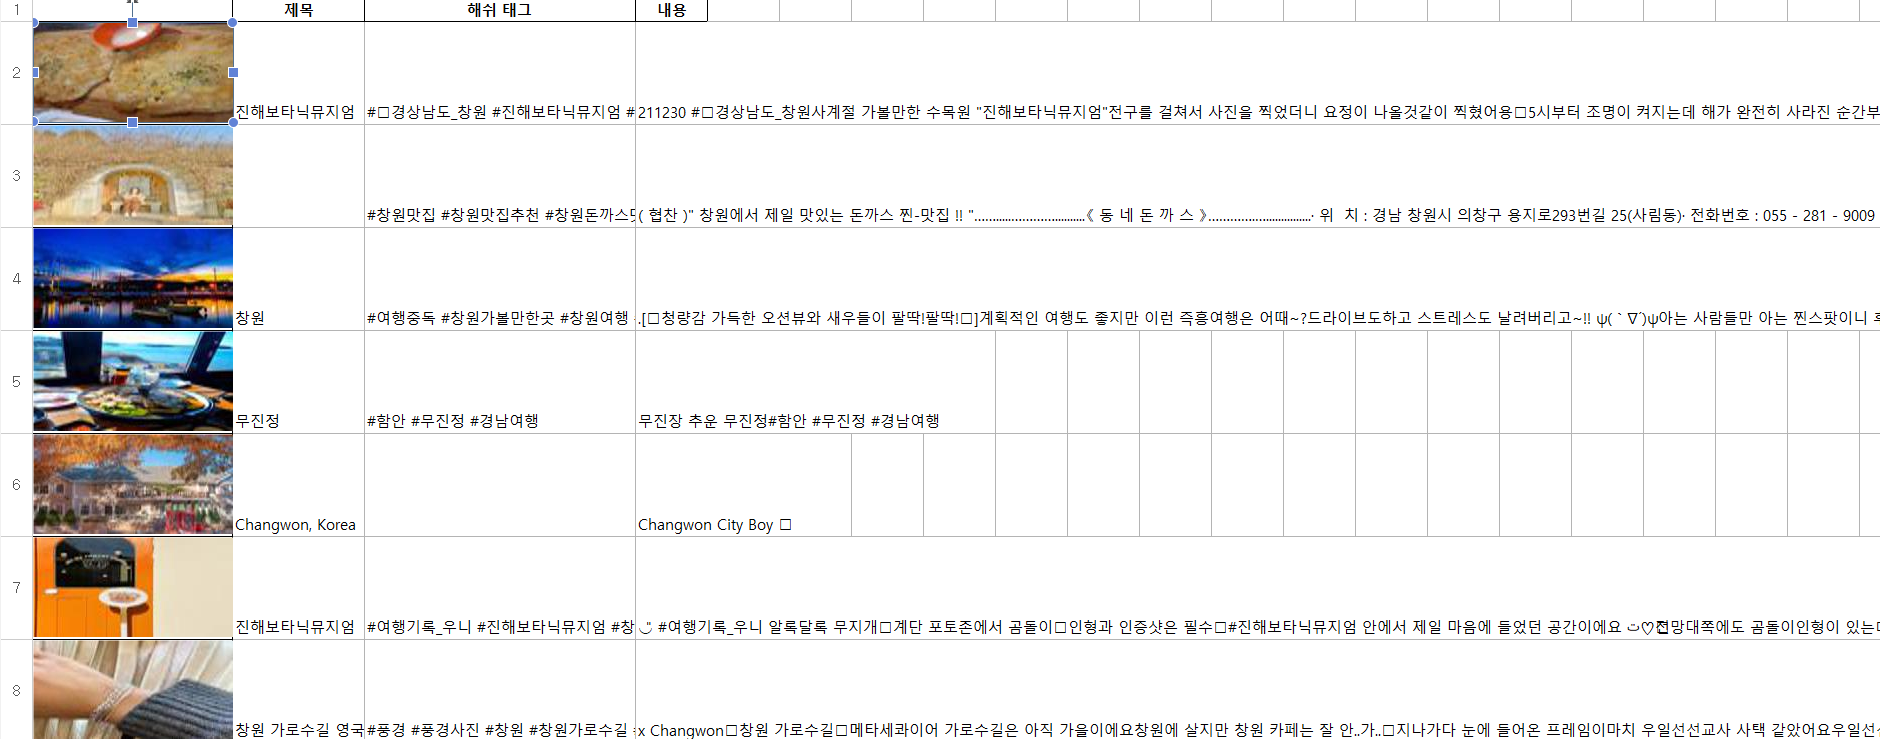